In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout

In [12]:
saree = pd.read_csv('sarees.csv')
saree.head()


,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,7432,Sarees,10,same as saree,woven design,small border,multicolor,party,jacquard,woven design,zari woven,applique,no
1,7433,Sarees,10,NaN,zari,small border,cream,traditional,NaN,NaN,zari woven,elephant,no
2,7434,Sarees,10,NaN,zari,small border,white,party,NaN,NaN,zari woven,floral,no
3,7435,Sarees,10,same as saree,woven design,big border,default,traditional,NaN,same as saree,zari woven,ethnic motif,no
4,7436,Sarees,10,solid,no border,NaN,NaN,daily,NaN,NaN,NaN,NaN,yes


In [13]:
for i in saree.columns:
  print(len(saree[i].unique()),saree[i].unique())

18346 [ 7432  7433  7434 ... 25775 25776 25777]
1 ['Sarees']
1 [10]
5 ['same as saree' nan 'solid' 'same as border' 'default']
7 ['woven design' 'zari' 'no border' 'solid' 'default' 'temple border' nan]
4 ['small border' 'big border' nan 'no border']
9 ['multicolor' 'cream' 'white' 'default' nan 'navy blue' 'yellow' 'green'
 'pink']
5 ['party' 'traditional' 'daily' nan 'wedding']
4 ['jacquard' nan 'default' 'tassels and latkans']
5 ['woven design' nan 'same as saree' 'default' 'zari woven']
6 ['zari woven' nan 'woven design' 'default' 'solid' 'printed']
10 ['applique' 'elephant' 'floral' 'ethnic motif' nan 'peacock' 'default'
 'solid' 'checked' 'botanical']
3 ['no' 'yes' nan]


In [14]:
column_to_drop = ['len']
sarees = saree.drop(column_to_drop, axis=1)

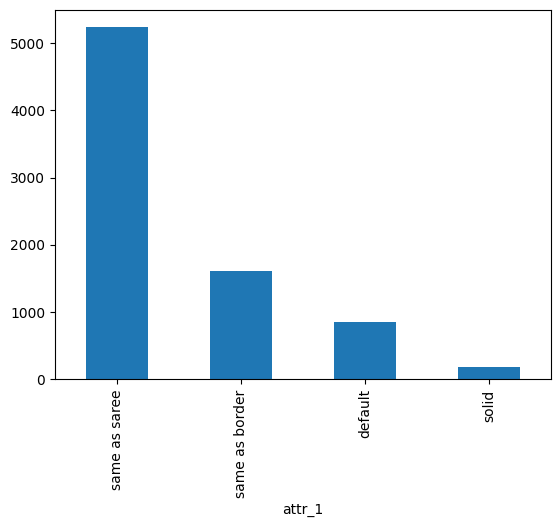

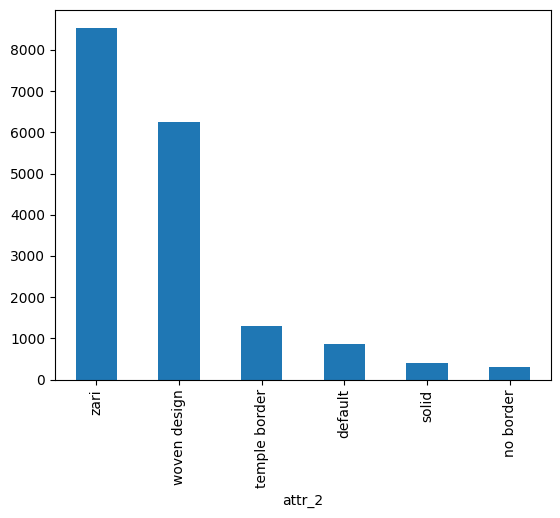

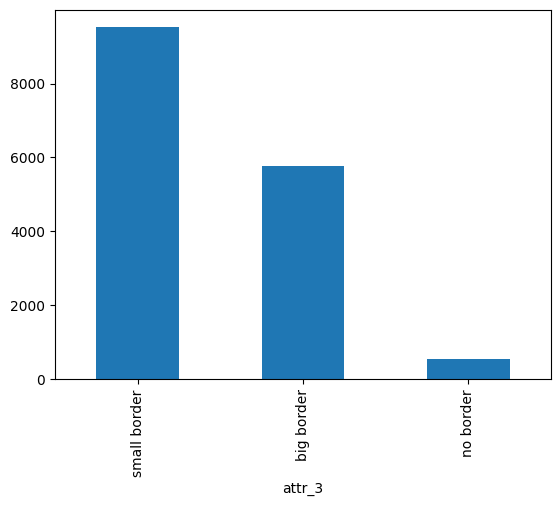

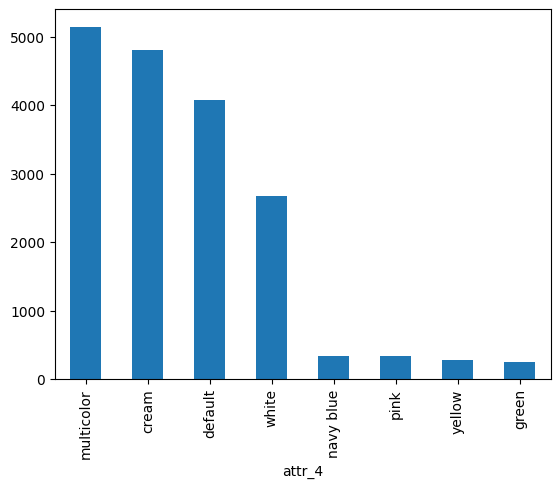

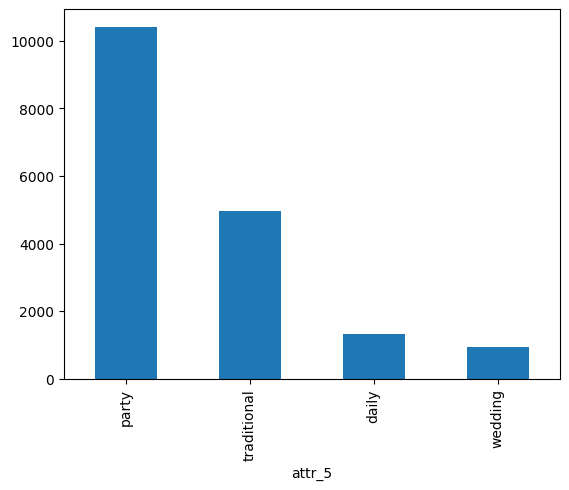

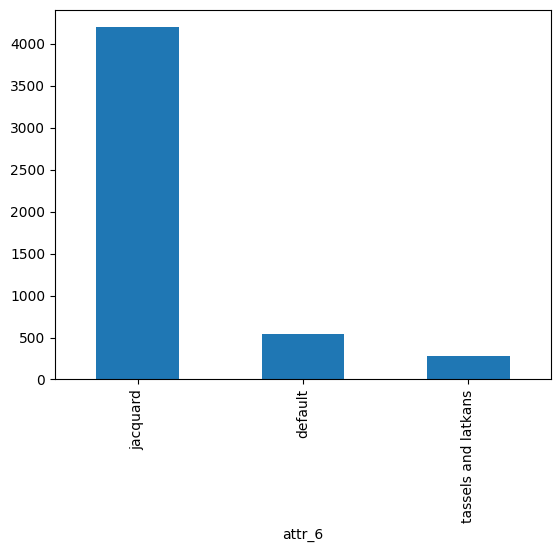

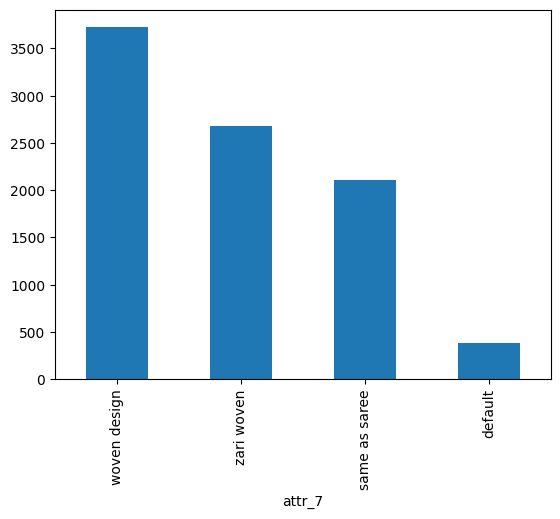

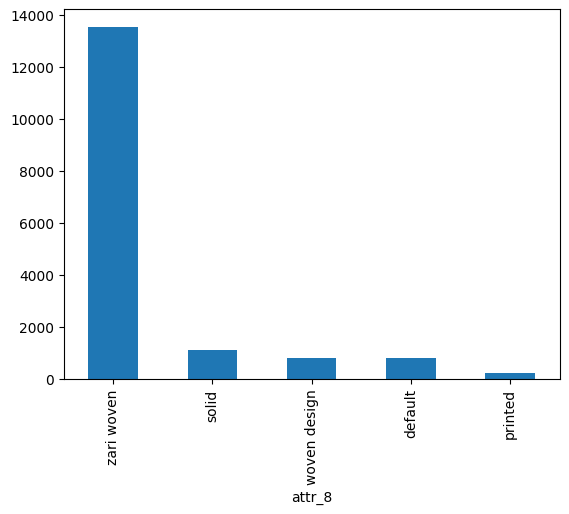

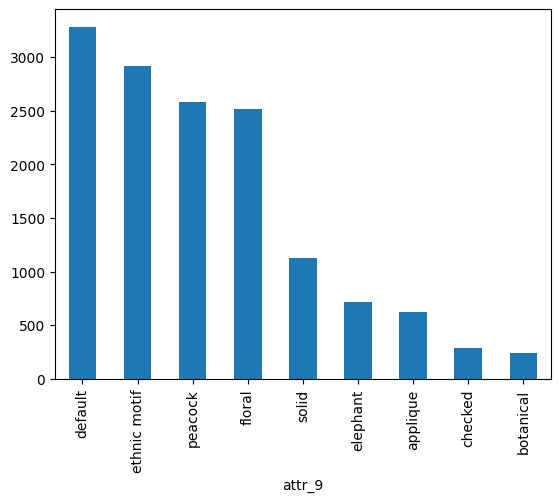

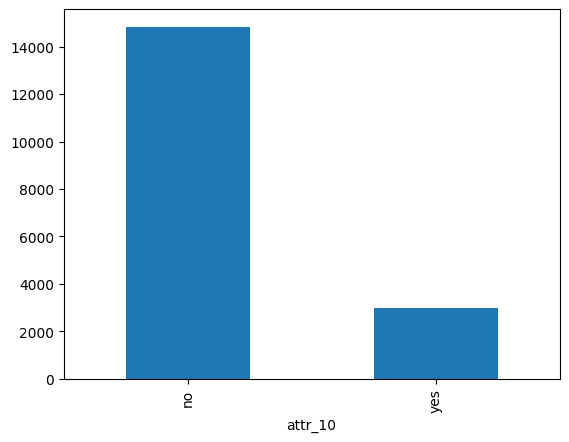

In [15]:
import matplotlib.pyplot as plt
for i in sarees.columns:
  if (i!='id') and (i!='Category'):
    sarees[i].value_counts().plot(kind='bar')
    plt.show()

In [16]:
sarees['attr_1'].fillna('same as saree',inplace=True) # same as saree
sarees['attr_2'].fillna('zari',inplace=True) # woven design
sarees['attr_3'].fillna('small border',inplace=True) # big border
sarees['attr_4'].fillna('multicolor',inplace=True) # cream
sarees['attr_5'].fillna('party',inplace=True) # traditional
sarees['attr_6'].fillna('jacquard',inplace=True) # jacquard
sarees['attr_7'].fillna('dummy_value',inplace=True) # woven design
sarees['attr_8'].fillna('zari woven',inplace=True) # zari woven
sarees['attr_9'].fillna('default',inplace=True) # default
sarees['attr_10'].fillna('no',inplace=True) # missing

/tmp/ipykernel_30/3779787085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sarees['attr_1'].fillna('same as saree',inplace=True) # same as saree
/tmp/ipykernel_30/3779787085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [17]:
X2 = sarees.iloc[:,0:2]
y2 = sarees.iloc[:,2:]

In [18]:
for i in y2.columns:
  print(i,y2[i].unique())

attr_1 ['same as saree' 'solid' 'same as border' 'default']
attr_2 ['woven design' 'zari' 'no border' 'solid' 'default' 'temple border']
attr_3 ['small border' 'big border' 'no border']
attr_4 ['multicolor' 'cream' 'white' 'default' 'navy blue' 'yellow' 'green'
 'pink']
attr_5 ['party' 'traditional' 'daily' 'wedding']
attr_6 ['jacquard' 'default' 'tassels and latkans']
attr_7 ['woven design' 'dummy_value' 'same as saree' 'default' 'zari woven']
attr_8 ['zari woven' 'woven design' 'default' 'solid' 'printed']
attr_9 ['applique' 'elephant' 'floral' 'ethnic motif' 'default' 'peacock' 'solid'
 'checked' 'botanical']
attr_10 ['no' 'yes']


In [19]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[
['same as saree','solid', 'same as border', 'default']  ,
['woven design' ,'zari' ,'no border' ,'solid', 'default' ,'temple border'],
['small border', 'big border' ,'no border'],
['multicolor','cream','white', 'default','navy blue', 'yellow',
 'green', 'pink'],
['party', 'traditional' ,'daily', 'wedding'],
['jacquard' ,'default', 'tassels and latkans'],
['woven design' ,'dummy_value' ,'same as saree' ,'default' ,'zari woven'],
['zari woven' ,'woven design' ,'default' ,'solid','printed'],
['applique', 'elephant', 'floral', 'ethnic motif', 'default', 'peacock',
  'solid', 'checked', 'botanical'],
['no', 'yes']

]
)

In [20]:
y2 = oe.fit_transform(y2)

In [21]:
y2 = pd.DataFrame(y2, columns=sarees.columns[2:])
y2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attr_1   18346 non-null  float64
 1   attr_2   18346 non-null  float64
 2   attr_3   18346 non-null  float64
 3   attr_4   18346 non-null  float64
 4   attr_5   18346 non-null  float64
 5   attr_6   18346 non-null  float64
 6   attr_7   18346 non-null  float64
 7   attr_8   18346 non-null  float64
 8   attr_9   18346 non-null  float64
 9   attr_10  18346 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [22]:
for i in y2.columns:
  print(i,y2[i].unique(),len(y2[i].unique()))

attr_1 [0. 1. 2. 3.] 4
attr_2 [0. 1. 2. 3. 4. 5.] 6
attr_3 [0. 1. 2.] 3
attr_4 [0. 1. 2. 3. 4. 5. 6. 7.] 8
attr_5 [0. 1. 2. 3.] 4
attr_6 [0. 1. 2.] 3
attr_7 [0. 1. 2. 3. 4.] 5
attr_8 [0. 1. 2. 3. 4.] 5
attr_9 [0. 1. 2. 3. 4. 5. 6. 7. 8.] 9
attr_10 [0. 1.] 2


In [23]:
import numpy as np
y2 = np.array(y2)

In [24]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
image_dir = '/kaggle/working/train_images'
max_digits = 6
image_paths = [os.path.join(image_dir, f'{i:0{max_digits}}.jpg') for i in range(7432, 25778)]
for path in image_paths:
    if not os.path.exists(path):
        print(f"Missing image: {path}")


def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, [128, 128])
        img = img / 255.0
        images.append(img)
    return np.array(images)

In [25]:
X2 = load_and_preprocess_images(image_paths)

In [26]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

input_shape = (128,128, 3)

input_layer = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# 5 6 3 8 4 4 5 5 9 2
output_attr1 = Dense(4, activation='softmax', name='attr1_output')(x)
output_attr2 = Dense(6, activation='softmax', name='attr2_output')(x)
output_attr3 = Dense(3, activation='softmax', name='attr3_output')(x)
output_attr4 = Dense(8, activation='softmax', name='attr4_output')(x)
output_attr5 = Dense(4, activation='softmax', name='attr5_output')(x)
output_attr6 = Dense(3, activation='softmax', name='attr6_output')(x)
output_attr7 = Dense(5, activation='softmax', name='attr7_output')(x)
output_attr8 = Dense(5, activation='softmax', name='attr8_output')(x)
output_attr9 = Dense(9, activation='softmax', name='attr9_output')(x)
output_attr10 = Dense(2, activation='softmax', name='attr10_output')(x)

saree = Model(inputs=input_layer, outputs=[output_attr1, output_attr2, output_attr3, output_attr4, output_attr5,output_attr6,output_attr7,output_attr8,output_attr9,output_attr10 ])

opt = Adam(0.0002)
saree.compile(optimizer=opt,
              loss={'attr1_output': 'sparse_categorical_crossentropy',
                    'attr2_output': 'sparse_categorical_crossentropy',
                    'attr3_output': 'sparse_categorical_crossentropy',
                    'attr4_output': 'sparse_categorical_crossentropy',
                    'attr5_output': 'sparse_categorical_crossentropy',
                    'attr6_output': 'sparse_categorical_crossentropy',
                    'attr7_output': 'sparse_categorical_crossentropy',
                    'attr8_output': 'sparse_categorical_crossentropy',
                    'attr9_output': 'sparse_categorical_crossentropy',
                    'attr10_output': 'sparse_categorical_crossentropy',
                    },
              metrics={'attr1_output': 'accuracy',
                       'attr2_output': 'accuracy',
                       'attr3_output': 'accuracy',
                       'attr4_output': 'accuracy',
                       'attr5_output': 'accuracy',
                       'attr6_output': 'accuracy',
                       'attr7_output': 'accuracy',
                       'attr8_output': 'accuracy',
                       'attr9_output': 'accuracy',
                       'attr10_output': 'accuracy',
                       })

saree.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │        128 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 63, 63,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 61, 61,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 59, 59,    │     73,856 │ dropout_1[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 59,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 59, 59,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 445568)    │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 57,032,832 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dropout_3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr1_output        │ (None, 4)         │        516 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr2_output        │ (None, 6)         │        774 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr3_output        │ (None, 3)         │        387 │ batch_normalizat

 Total params: 57,133,809 (217.95 MB)

 Trainable params: 57,133,105 (217.95 MB)

 Non-trainable params: 704 (2.75 KB)

In [39]:
X2_filtered = X2[0:15000]
y2_filtered = y2[0:15000]
X2_train, X2_val, y2_train, y2_val = train_test_split(
    X2_filtered, y2_filtered, test_size=0.2, random_state=42
)

In [40]:
y2_train_attr1 = y2_train[:, 0]
y2_train_attr2 = y2_train[:, 1]
y2_train_attr3 = y2_train[:, 2]
y2_train_attr4 = y2_train[:, 3]
y2_train_attr5 = y2_train[:, 4]
y2_train_attr6 = y2_train[:, 5]
y2_train_attr7 = y2_train[:, 6]
y2_train_attr8 = y2_train[:, 7]
y2_train_attr9 = y2_train[:, 8]
y2_train_attr10 = y2_train[:, 9]

In [41]:
y2_val_attr1 = y2_val[:, 0]
y2_val_attr2 = y2_val[:, 1]
y2_val_attr3 = y2_val[:, 2]
y2_val_attr4 = y2_val[:, 3]
y2_val_attr5 = y2_val[:, 4]
y2_val_attr6 = y2_val[:, 5]
y2_val_attr7 = y2_val[:, 6]
y2_val_attr8 = y2_val[:, 7]
y2_val_attr9 = y2_val[:, 8]
y2_val_attr10 = y2_val[:, 9]

In [42]:
batch_size = 64
epochs = 10
saree.fit(X2_train,
          [y2_train_attr1, y2_train_attr2, y2_train_attr3, y2_train_attr4, y2_train_attr5,y2_train_attr6,y2_train_attr7,y2_train_attr8,y2_train_attr9,y2_train_attr10],
          validation_data=(X2_val,
                           [y2_val_attr1, y2_val_attr2, y2_val_attr3, y2_val_attr4, y2_val_attr5,y2_val_attr6,y2_val_attr7,y2_val_attr8,y2_val_attr9,y2_val_attr10]),
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - attr10_output_accuracy: 0.8393 - attr1_output_accuracy: 0.8739 - attr2_output_accuracy: 0.6747 - attr3_output_accuracy: 0.8380 - attr4_output_accuracy: 0.5671 - attr5_output_accuracy: 0.7084 - attr6_output_accuracy: 0.9572 - attr7_output_accuracy: 0.6161 - attr8_output_accuracy: 0.8615 - attr9_output_accuracy: 0.6376 - loss: 5.8991 - val_attr10_output_accuracy: 0.8310 - val_attr1_output_accuracy: 0.8737 - val_attr2_output_accuracy: 0.7003 - val_attr3_output_accuracy: 0.8507 - val_attr4_output_accuracy: 0.5683 - val_attr5_output_accuracy: 0.7203 - val_attr6_output_accuracy: 0.9607 - val_attr7_output_accuracy: 0.6287 - val_attr8_output_accuracy: 0.8637 - val_attr9_output_accuracy: 0.6657 - val_loss: 5.5981
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - attr10_output_accuracy: 0.8439 - attr1_output_accuracy: 0.8702 - attr2_output_accuracy: 0.6848 - attr3_output_accuracy: 0.8426 - attr4_output_accuracy: 0.5645 - attr5_output_a

In [44]:
saree.save('saree_weights.keras')

In [45]:
from sklearn.preprocessing import LabelEncoder

# Assuming these are the LabelEncoders used during encoding
attr1_encoder = LabelEncoder()
attr2_encoder = LabelEncoder()
attr3_encoder = LabelEncoder()
attr4_encoder = LabelEncoder()
attr5_encoder = LabelEncoder()
attr6_encoder = LabelEncoder()
attr7_encoder = LabelEncoder()
attr8_encoder = LabelEncoder()
attr9_encoder = LabelEncoder()
attr10_encoder = LabelEncoder()

# Fit the encoders with the classes if not already done (replace with actual classes)
attr1_encoder.fit(y2_train_attr1)
attr2_encoder.fit(y2_train_attr2)
attr3_encoder.fit(y2_train_attr3)
attr4_encoder.fit(y2_train_attr4)
attr5_encoder.fit(y2_train_attr5)
attr6_encoder.fit(y2_train_attr6)
attr7_encoder.fit(y2_train_attr7)
attr8_encoder.fit(y2_train_attr8)
attr9_encoder.fit(y2_train_attr9)
attr10_encoder.fit(y2_train_attr10)

predictions = []

# Get model predictions for all attributes
pred_attr1, pred_attr2, pred_attr3, pred_attr4, pred_attr5,pred_attr6,pred_attr7,pred_attr8,pred_attr9,pred_attr10 = saree.predict(X2_val)

# Iterate over each sample and decode predictions
for i in range(len(X2_val)):
    predicted_attr1_label = attr1_encoder.inverse_transform([np.argmax(pred_attr1[i], axis=0)])[0]
    predicted_attr2_label = attr2_encoder.inverse_transform([np.argmax(pred_attr2[i], axis=0)])[0]
    predicted_attr3_label = attr3_encoder.inverse_transform([np.argmax(pred_attr3[i], axis=0)])[0]
    predicted_attr4_label = attr4_encoder.inverse_transform([np.argmax(pred_attr4[i], axis=0)])[0]
    predicted_attr5_label = attr5_encoder.inverse_transform([np.argmax(pred_attr5[i], axis=0)])[0]
    predicted_attr6_label = attr6_encoder.inverse_transform([np.argmax(pred_attr6[i], axis=0)])[0]
    predicted_attr7_label = attr7_encoder.inverse_transform([np.argmax(pred_attr7[i], axis=0)])[0]
    predicted_attr8_label = attr8_encoder.inverse_transform([np.argmax(pred_attr8[i], axis=0)])[0]
    predicted_attr9_label = attr9_encoder.inverse_transform([np.argmax(pred_attr9[i], axis=0)])[0]
    predicted_attr10_label = attr10_encoder.inverse_transform([np.argmax(pred_attr10[i], axis=0)])[0]
      

    predictions.append((
        predicted_attr1_label,
        predicted_attr2_label,
        predicted_attr3_label,
        predicted_attr4_label,
        predicted_attr5_label,
        predicted_attr6_label,
        predicted_attr7_label,
        predicted_attr8_label,
        predicted_attr9_label,
        predicted_attr10_label
    ))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=[
    "Attribute 1", "Attribute 2", "Attribute 3", "Attribute 4", "Attribute 5","Attribute 6","Attribute 7","Attribute 8","Attribute 9","Attribute 10"
])

# Preview the DataFrame
print(predictions_df.head())


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
   Attribute 1  Attribute 2  Attribute 3  Attribute 4  Attribute 5  \
0          0.0          5.0          0.0          1.0          0.0   
1          0.0          1.0          0.0          1.0          0.0   
2          0.0          1.0          0.0          1.0          0.0   
3          0.0          1.0          0.0          1.0          0.0   
4          0.0          5.0          0.0          1.0          0.0   

   Attribute 6  Attribute 7  Attribute 8  Attribute 9  Attribute 10  
0          0.0          1.0          0.0          5.0           0.0  
1          0.0          1.0          0.0          2.0           0.0  
2          0.0          1.0          0.0          2.0           0.0  
3          0.0          1.0          0.0          5.0           0.0  
4          0.0          1.0          0.0          5.0           0.0  


In [46]:

from sklearn.metrics import f1_score

# Initialize lists to store attribute-wise scores
micro_f1_scores = []
macro_f1_scores = []

# Iterate through each attribute's ground truth and predictions
for i, (y_true_attr, y_pred_attr) in enumerate(zip(
        [y2_val_attr1, y2_val_attr2, y2_val_attr3, y2_val_attr4, y2_val_attr5,y2_val_attr6,y2_val_attr7,y2_val_attr8,y2_val_attr9,y2_val_attr10],
        [predictions_df["Attribute 1"], 
         predictions_df["Attribute 2"], 
         predictions_df["Attribute 3"], 
         predictions_df["Attribute 4"], 
         predictions_df["Attribute 5"],
         predictions_df["Attribute 6"],
         predictions_df["Attribute 7"],
         predictions_df["Attribute 8"],
         predictions_df["Attribute 9"],
         predictions_df["Attribute 10"]
        ])):
    
    # Calculate F1-scores for this attribute
    micro_f1 = f1_score(y_true_attr, y_pred_attr, average='micro')
    macro_f1 = f1_score(y_true_attr, y_pred_attr, average='macro')
    
    # Store the results
    micro_f1_scores.append(micro_f1)
    macro_f1_scores.append(macro_f1)


# Print overall summary
print("\nSummary of Attribute-Wise F1-Scores:")
for i in range(len(micro_f1_scores)):
    print(f"Attribute {i + 1}: Micro F1 = {micro_f1_scores[i]:.4f}, Macro F1 = {macro_f1_scores[i]:.4f}")



Summary of Attribute-Wise F1-Scores:
Attribute 1: Micro F1 = 0.8707, Macro F1 = 0.4380
Attribute 2: Micro F1 = 0.6937, Macro F1 = 0.6418
Attribute 3: Micro F1 = 0.8553, Macro F1 = 0.7670
Attribute 4: Micro F1 = 0.5593, Macro F1 = 0.3921
Attribute 5: Micro F1 = 0.7247, Macro F1 = 0.5090
Attribute 6: Micro F1 = 0.9613, Macro F1 = 0.5431
Attribute 7: Micro F1 = 0.6200, Macro F1 = 0.3756
Attribute 8: Micro F1 = 0.8583, Macro F1 = 0.4906
Attribute 9: Micro F1 = 0.6557, Macro F1 = 0.4357
Attribute 10: Micro F1 = 0.8313, Macro F1 = 0.4578


In [ ]:
test = pd.read_csv('/kaggle/working/s1.csv')

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the class labels for each of the 10 new attributes
attr1_classes = ['same as saree', 'solid', 'same as border', 'default']
attr2_classes = ['woven design', 'zari', 'no border', 'solid', 'default', 'temple border']
attr3_classes = ['small border', 'big border', 'no border']
attr4_classes = ['multicolor', 'cream', 'white', 'default', 'navy blue', 'yellow', 'green', 'pink']
attr5_classes = ['party', 'traditional', 'daily', 'wedding']
attr6_classes = ['jacquard', 'default', 'tassels and latkans']
attr7_classes = ['woven design', 'dummy_value', 'same as saree', 'default', 'zari woven']
attr8_classes = ['zari woven', 'woven design', 'default', 'solid', 'printed']
attr9_classes = ['applique', 'elephant', 'floral', 'ethnic motif', 'default', 'peacock', 'solid', 'checked', 'botanical']
attr10_classes = ['no', 'yes']

# Set the directory for test images
test_image_dir = '/kaggle/input/visual-taxonomy/test_images'  # Adjust this path as necessary

# Load test data from CSV
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'  # Adjust this path as necessary
df = pd.read_csv(test_csv_path)

# Check if the DataFrame contains the expected columns
print(df.head())  # Debugging output

# Get the desired range of entries
df_sample = df[3787:10889]

# Prepare a list to hold the images and predictions
predictions = []

# Loop through the images
for index, row in df_sample.iterrows():
    image_file = f"{int(row['id']):06}.jpg"  # Assuming the CSV has an 'id' column
    image_path = os.path.join(test_image_dir, image_file)

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load and preprocess the image
    test_img = cv2.imread(image_path)
    if test_img is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Resize and reshape the image
    test_img_resized = cv2.resize(test_img, (128, 128))
    test_input = test_img_resized.reshape((1, 128, 128, 3)) / 255.0  # Normalize

    # Make predictions for each attribute
    preds = saree.predict(test_input)  # Assuming this returns a list of 10 predictions
    predicted_indices = [np.argmax(pred, axis=1)[0] for pred in preds]

    # Store predictions by mapping indices to class labels
    predictions.append((
        image_file,
        attr1_classes[predicted_indices[0]],
        attr2_classes[predicted_indices[1]],
        attr3_classes[predicted_indices[2]],
        attr4_classes[predicted_indices[3]],
        attr5_classes[predicted_indices[4]],
        attr6_classes[predicted_indices[5]],
        attr7_classes[predicted_indices[6]],
        attr8_classes[predicted_indices[7]],
        attr9_classes[predicted_indices[8]],
        attr10_classes[predicted_indices[9]]
    ))

    # Update DataFrame with predicted labels
    test.loc[index, 'attr_1'] = attr1_classes[predicted_indices[0]]
    test.loc[index, 'attr_2'] = attr2_classes[predicted_indices[1]]
    test.loc[index, 'attr_3'] = attr3_classes[predicted_indices[2]]
    test.loc[index, 'attr_4'] = attr4_classes[predicted_indices[3]]
    test.loc[index, 'attr_5'] = attr5_classes[predicted_indices[4]]
    test.loc[index, 'attr_6'] = attr6_classes[predicted_indices[5]]
    test.loc[index, 'attr_7'] = attr7_classes[predicted_indices[6]]
    test.loc[index, 'attr_8'] = attr8_classes[predicted_indices[7]]
    test.loc[index, 'attr_9'] = attr9_classes[predicted_indices[8]]
    test.loc[index, 'attr_10'] = attr10_classes[predicted_indices[9]]
    test.loc[index, 'len'] = 10

# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['id', 'attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'])

In [ ]:
test.to_csv('s2.csv')

-----------------------------------------THE END----------------------------------------------